#Import Library and data

In [ ]:
#import Library
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#import data from github
url = 'https://raw.githubusercontent.com/NutnichaFah/DSI314-Project/main/List_Company.csv'
data = pd.read_csv(url)

#1. Exploratory Data Analysis (EDA)

In [ ]:
data

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,BEHEYT,1968.0,54.0,NaN,NaN,56,NaN,no,no,no,inactive
1,BIK BIJOUX IMPENS B.V.B.A.,NaN,NaN,NaN,NaN,56,NaN,no,no,no,inactive
2,BOSCHMANS N.V.,1865.0,157.0,NaN,NaN,56,NaN,no,no,no,inactive
3,"E. VAN RANST, ZONEN B.V.B.A.",1968.0,54.0,NaN,NaN,56,NaN,yes,no,no,active
4,WOUTERS & HENDRIX N.V.,NaN,NaN,NaN,NaN,56,NaN,no,no,no,inactive
...,...,...,...,...,...,...,...,...,...,...,...
626,JENNY PERL FOR JMP,NaN,NaN,NaN,NaN,840,NaN,no,no,no,active
627,JEWELERY UNLIMITED INC. DBA INDIA GEMS,NaN,NaN,NaN,NaN,840,14263859.0,yes,no,yes,active
628,JEWELEX NEW YORK LTD.,NaN,NaN,NaN,NaN,840,14614085.0,yes,no,no,active
629,JEWELMARK INC.,NaN,NaN,NaN,NaN,840,NaN,yes,no,no,active


In [ ]:
# ดูภาพรวมของข้อมูล
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        631 non-null    object 
 1   incorporation_date  373 non-null    float64
 2   Period              370 non-null    float64
 3   income ($M)         109 non-null    object 
 4   num_employee        158 non-null    object 
 5   country_code        631 non-null    int64  
 6   web_globalrank      182 non-null    float64
 7   has_domain          629 non-null    object 
 8   has_instargram      630 non-null    object 
 9   has_facebook        630 non-null    object 
 10  Status              631 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 54.4+ KB


In [ ]:
#ตรวจสอบจำนวน missing value
null_cols_values = data.isnull().sum()
null_datapoints = null_cols_values[null_cols_values>0].sum()

print(null_cols_values)
print(f"sum of Missing Value = {null_datapoints}")

Company_Name            0
incorporation_date    258
Period                261
income ($M)           522
num_employee          473
country_code            0
web_globalrank        449
has_domain              2
has_instargram          1
has_facebook            1
Status                  0
dtype: int64
sum of Missing Value = 1967


In [ ]:
# ตรวจสอบค่า Unique
data.nunique()

Company_Name          630
incorporation_date     96
Period                 96
income ($M)            20
num_employee            9
country_code           31
web_globalrank        182
has_domain              2
has_instargram          2
has_facebook            2
Status                  2
dtype: int64

In [ ]:
#สร้างฟังก์ชัน เพื่อสร้างกราฟ
def val_count_BarPlot(data=None, count_cols=None):
  data_count = data[count_cols].value_counts()
  fig, ax = plt.subplots(figsize=(10, 8))
  pbar = ax.bar(data_count.index.astype(str),data_count.values)
  ax.set_title(f"{count_cols} values count")

  plt.show()

In [ ]:
#สร้างฟังก์ชัน เพื่อสร้างกราฟ
def val_count_BarhPlot(data=None, count_cols=None):
  data_count = data[count_cols].value_counts()
  fig, ax = plt.subplots(figsize=(10, 8))
  pbar = ax.barh(data_count.index.astype(str),data_count.values)
  ax.set_title(f"{count_cols} values count")

  plt.show()

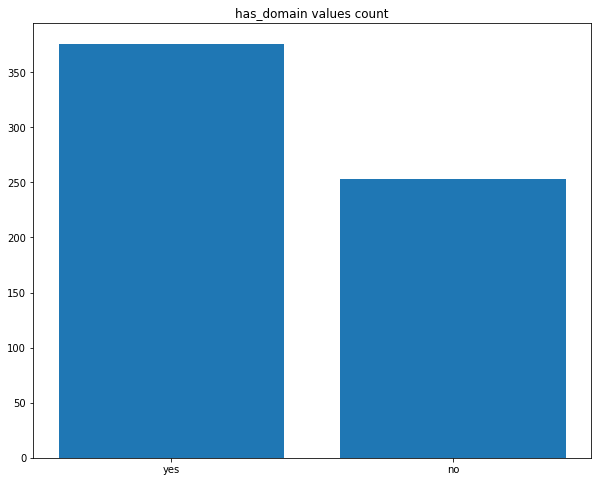

In [ ]:
#กราฟแท่งของคอลัมน์ has_domain
val_count_BarPlot(data=data, count_cols='has_domain')

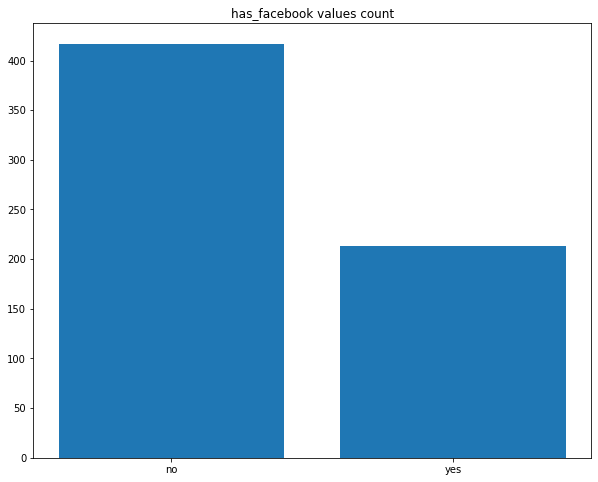

In [ ]:
#กราฟแท่งของคอลัมน์ has_facebook
val_count_BarPlot(data=data, count_cols='has_facebook')

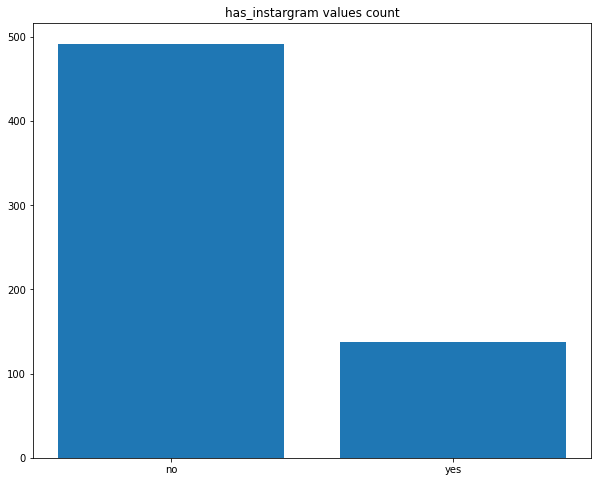

In [ ]:
#กราฟแท่งของคอลัมน์ has_instargram
val_count_BarPlot(data=data, count_cols='has_instargram')

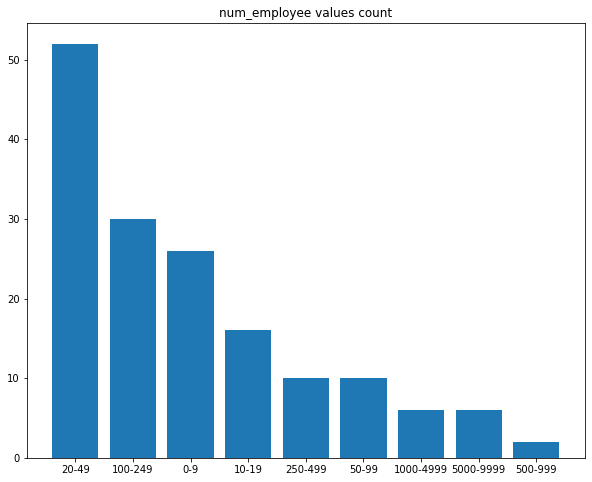

In [ ]:
#กราฟแท่งของคอลัมน์ num_employee
val_count_BarPlot(data=data, count_cols='num_employee')

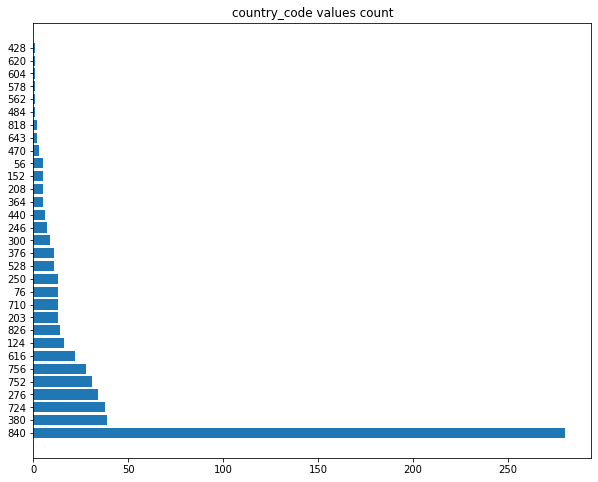

In [ ]:
#กราฟแท่งของคอลัมน์ country_code
val_count_BarhPlot(data=data, count_cols='country_code')

-------------


#2. Feature Engineering

In [ ]:
#เติมค่าว่างในคอลัมน์ has_domain,has_instargram,has_facebook
data['has_domain'] = data['has_domain'].fillna('no')
data['has_instargram'] = data['has_instargram'].fillna('no') 
data['has_facebook'] = data['has_facebook'].fillna('no') 

In [ ]:
null = data.isnull().sum()
null

Company_Name            0
incorporation_date    258
Period                261
income ($M)           522
num_employee          473
country_code            0
web_globalrank        449
has_domain              0
has_instargram          0
has_facebook            0
Status                  0
dtype: int64

In [ ]:
#เติมค่าว่างในคอลัมน์ num_employee ด้วยค่า mode
data['num_employee'] = data['num_employee'].fillna(data['num_employee'].mode()[0])

In [ ]:
#เติมค่า 0 ใน ค่าว่างของคอลัมน์ web_globalrank
data['web_globalrank'] = data['web_globalrank'].fillna(0)

In [ ]:
#ในข้อมูลมีประเทศที่ไม่ต้องการ คือ ประเทศที่มีรหัส 364,376
#เรียกดูแถวที่มีประเทศที่มีรหัส 364
data[data['country_code'] == 364]

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
122,ALIREZA JEWELRY,NaN,NaN,NaN,20-49,364,0.0,no,no,no,active
123,TEHRAN GOLDEN ARVIN TRADING CO.,NaN,NaN,NaN,20-49,364,0.0,no,no,no,active
124,ZARTAB JEWELRY CO.,1999.0,23.0,6 - 10,20-49,364,0.0,no,no,no,active
125,ANTHONY NICHOLAS GROUP,1936.0,86.0,NaN,250-499,364,242789.0,yes,yes,yes,active
126,ALLE MEGIDDO LTD.,1976.0,46.0,NaN,20-49,364,0.0,no,no,no,active


In [ ]:
#ดรอปแถวที่มีประเทศที่มีรหัส 364
data.drop(data.index[[122,123,124,125,126]], inplace=True)

In [ ]:
#เรียกดูอีกครั้ง เพื่อเช็คว่าดรอปแล้วหรือยัง
data[data['country_code'] == 364]

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status


In [ ]:
#เรียกดูแถวที่มีประเทศที่มีรหัส 376
data[data['country_code'] == 376]

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
127,BAT-AMI LTD.,1960.0,62.0,6 - 10,10-19,376,0.0,yes,no,yes,active
128,CITRA JEWELRY LTD.,1979.0,43.0,NaN,20-49,376,0.0,yes,no,no,active
129,COHEN YOSSI JEWELLERY,NaN,NaN,NaN,20-49,376,0.0,no,no,no,active
130,DENIR INTERNATIONAL LTD.,NaN,NaN,NaN,20-49,376,0.0,no,no,no,active
131,H.R. DIAMONDS LTD.,1982.0,40.0,NaN,20-49,376,0.0,no,no,no,active
132,INBAR FINE JEWELLERY,1998.0,24.0,NaN,20-49,376,0.0,no,no,no,active
133,INTERNATIONAL BULLION AND METAL BROKERS (TEL A...,2010.0,12.0,NaN,20-49,376,0.0,yes,no,no,active
134,JAFFA GOLD INTERNATIONAL LTD.,1994.0,28.0,NaN,20-49,376,0.0,no,no,no,active
135,LICAST JEWELLER QUALITY TOOLS LTD.,NaN,NaN,NaN,20-49,376,0.0,no,no,no,active
136,MARINA JEWELLERY LTD.,1996.0,26.0,NaN,20-49,376,0.0,yes,yes,yes,active


In [ ]:
#ดรอปแถวที่มีประเทศที่มีรหัส 376
data = data.drop(labels=[127,128,129,130,131,132,133,134,135,136,137], axis=0)

In [ ]:
#เรียกดูอีกครั้ง เพื่อเช็คว่าดรอปแล้วหรือยัง
data[data['country_code'] == 376]

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status


In [ ]:
data

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,BEHEYT,1968.0,54.0,NaN,20-49,56,0.0,no,no,no,inactive
1,BIK BIJOUX IMPENS B.V.B.A.,NaN,NaN,NaN,20-49,56,0.0,no,no,no,inactive
2,BOSCHMANS N.V.,1865.0,157.0,NaN,20-49,56,0.0,no,no,no,inactive
3,"E. VAN RANST, ZONEN B.V.B.A.",1968.0,54.0,NaN,20-49,56,0.0,yes,no,no,active
4,WOUTERS & HENDRIX N.V.,NaN,NaN,NaN,20-49,56,0.0,no,no,no,inactive
...,...,...,...,...,...,...,...,...,...,...,...
626,JENNY PERL FOR JMP,NaN,NaN,NaN,20-49,840,0.0,no,no,no,active
627,JEWELERY UNLIMITED INC. DBA INDIA GEMS,NaN,NaN,NaN,20-49,840,14263859.0,yes,no,yes,active
628,JEWELEX NEW YORK LTD.,NaN,NaN,NaN,20-49,840,14614085.0,yes,no,no,active
629,JEWELMARK INC.,NaN,NaN,NaN,20-49,840,0.0,yes,no,no,active


In [ ]:
#Label encoding คอลัมน์ has_domain, has_instargram, has_facebook
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['has_domain']= label_encoder.fit_transform(data['has_domain'])
data['has_instargram']= label_encoder.fit_transform(data['has_instargram'])
data['has_facebook']= label_encoder.fit_transform(data['has_facebook'])

#เช็คว่าข้อมูลได้แปลงเป็น 0,1 แล้วหรือยัง
data['has_domain'].unique()

array([0, 1])

In [ ]:
#เติมค่า mode ในคอลัมน์ incorporation_date
data['incorporation_date'] = data['incorporation_date'].fillna(data['incorporation_date'].mode()[0])

In [ ]:
#เติมค่าว่าง คอลัมน์ Period ด้วยการนำค่า ปี 2022 ลบ ค่าคอลัมน์ incorporation_date 
data['Period'] = data['Period'].fillna(2022-data['incorporation_date'])

In [ ]:
#correlation
data_correlation = data.copy()

#Label encoding 'Status' column
data_correlation['Status']= label_encoder.fit_transform(data_correlation['Status'])

In [ ]:
data_correlation

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,BEHEYT,1968.0,54.0,NaN,20-49,56,0.0,0,0,0,1
1,BIK BIJOUX IMPENS B.V.B.A.,1995.0,27.0,NaN,20-49,56,0.0,0,0,0,1
2,BOSCHMANS N.V.,1865.0,157.0,NaN,20-49,56,0.0,0,0,0,1
3,"E. VAN RANST, ZONEN B.V.B.A.",1968.0,54.0,NaN,20-49,56,0.0,1,0,0,0
4,WOUTERS & HENDRIX N.V.,1995.0,27.0,NaN,20-49,56,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
626,JENNY PERL FOR JMP,1995.0,27.0,NaN,20-49,840,0.0,0,0,0,0
627,JEWELERY UNLIMITED INC. DBA INDIA GEMS,1995.0,27.0,NaN,20-49,840,14263859.0,1,0,1,0
628,JEWELEX NEW YORK LTD.,1995.0,27.0,NaN,20-49,840,14614085.0,1,0,0,0
629,JEWELMARK INC.,1995.0,27.0,NaN,20-49,840,0.0,1,0,0,0


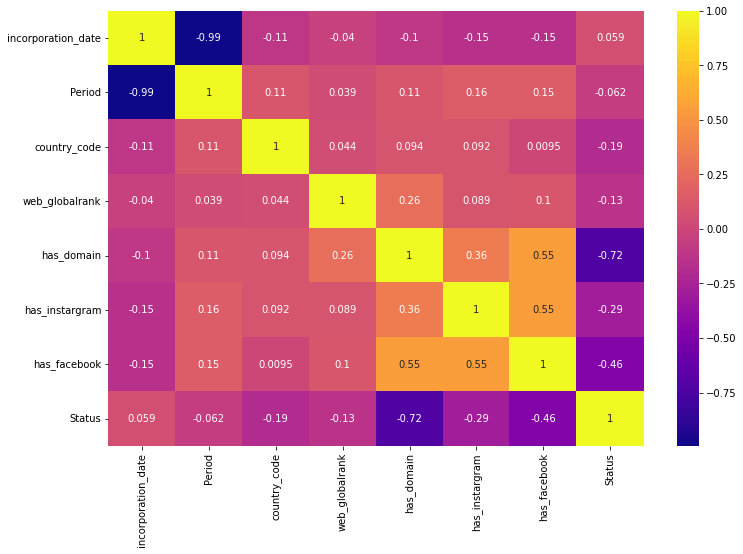

In [ ]:
#heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data_correlation.corr(),annot=True,cmap="plasma")
plt.show()

------------------------------

In [ ]:
data

,Company_Name,incorporation_date,Period,income ($M),num_employee,country_code,web_globalrank,has_domain,has_instargram,has_facebook,Status
0,BEHEYT,1968.0,54.0,NaN,20-49,56,0.0,0,0,0,inactive
1,BIK BIJOUX IMPENS B.V.B.A.,1995.0,27.0,NaN,20-49,56,0.0,0,0,0,inactive
2,BOSCHMANS N.V.,1865.0,157.0,NaN,20-49,56,0.0,0,0,0,inactive
3,"E. VAN RANST, ZONEN B.V.B.A.",1968.0,54.0,NaN,20-49,56,0.0,1,0,0,active
4,WOUTERS & HENDRIX N.V.,1995.0,27.0,NaN,20-49,56,0.0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...
626,JENNY PERL FOR JMP,1995.0,27.0,NaN,20-49,840,0.0,0,0,0,active
627,JEWELERY UNLIMITED INC. DBA INDIA GEMS,1995.0,27.0,NaN,20-49,840,14263859.0,1,0,1,active
628,JEWELEX NEW YORK LTD.,1995.0,27.0,NaN,20-49,840,14614085.0,1,0,0,active
629,JEWELMARK INC.,1995.0,27.0,NaN,20-49,840,0.0,1,0,0,active


#3. Data Preparation

In [ ]:
#ดรอปคอลัมน์ที่ไม่ได้ใช้
data.drop(columns = ['income ($M)','Company_Name','num_employee','incorporation_date','Period'],inplace = True)

------------------

#4. Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_M = data.copy()

In [ ]:
X = data_M.drop(columns = ['Status'], axis=1)
Y = data_M['Status']

In [ ]:
Y = Y.map({'active':0, 'inactive':1}).astype(int) 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
x_train

,country_code,web_globalrank,has_domain,has_instargram,has_facebook
83,276,6423939.0,1,0,1
90,276,0.0,0,0,0
244,724,0.0,0,1,0
525,840,0.0,1,1,1
345,826,620761.0,1,0,1
...,...,...,...,...,...
71,250,1897457.0,1,0,1
106,276,0.0,0,0,0
286,752,0.0,0,0,0
451,840,807856.0,1,1,1


In [ ]:
x_test

,country_code,web_globalrank,has_domain,has_instargram,has_facebook
264,724,0.0,0,0,0
381,840,3457783.0,1,0,1
448,840,0.0,0,0,0
626,840,0.0,0,0,0
148,380,0.0,0,0,0
...,...,...,...,...,...
297,752,0.0,0,0,0
307,752,5551819.0,1,0,1
266,724,0.0,0,0,0
11,76,0.0,1,0,1


In [ ]:
Y

0      1
1      1
2      1
3      0
4      1
      ..
626    0
627    0
628    0
629    0
630    0
Name: Status, Length: 615, dtype: int64

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_CLF = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [ ]:
# เทรนโมเดล
rf_CLF.fit(x_train.values, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [ ]:
# ทำนายผล
y_predict = rf_CLF.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn import metrics

In [ ]:
# สร้างฟังก์ชันสำหรับการประเมินโมเดล
def modelEvaluation(Y_test=None, predictions=None):
  accuracy = metrics.accuracy_score(Y_test, predictions)
  precision = metrics.precision_score(Y_test, predictions)
  recall = metrics.recall_score(Y_test, predictions)
  f1 = metrics.f1_score(Y_test, predictions)

  print(f"Accuracy = {np.round(accuracy, 4)}")
  print(f"Precision = {np.round(precision, 4)}")
  print(f"recall = {np.round(recall, 4)}")
  print(f"F1 = {np.round(f1, 4)}")

In [ ]:
#ผลการประเมินค่าความแม่นยำของโมเดล
modelEvaluation(Y_test=y_test, predictions=y_predict)

Accuracy = 0.8862
Precision = 0.9118
recall = 0.7381
F1 = 0.8158


----------